In [1]:
import sys
# network generation makes use of the sypy-library
sys.path.append('./sypy')

import sypy

import networkx as nx

import numpy as np

import matplotlib.pyplot as plt

import random

from scipy.optimize import minimize

%matplotlib inline

global_seed = 42

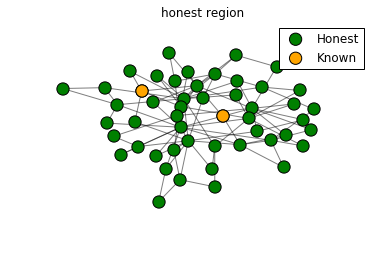

In [2]:
# honest graphs
honest_powerlaw_50 = sypy.PowerLawGraph(50, 2, .3, seed=global_seed)
honest_powerlaw_200 = sypy.PowerLawGraph(200, 2, .3, seed=global_seed)
honest_powerlaw_500 = sypy.PowerLawGraph(500, 2, .3, seed=global_seed)
honest_powerlaw_huge = sypy.PowerLawGraph(1000, 2, .3, seed=global_seed)
honest_cluster_gn_4 = sypy.GirvanNewmanCommunityGraph(num_comm=4, comm_size=50, avg_intercomm=1, 
                                                      seed=global_seed)
honest_cluster_lrf_8 = sypy.LFRCommunityGraph(num_comm=8, max_comm=100, comm_exp=1.5, max_degree=10, 
                                              degree_exp=1.5, mixing_par=0.075, tries=3, seed=global_seed)
honest_small_complete = sypy.CompleteGraph(5)
small_world = sypy.SmallWorldGraph(9, 4, .8)

# honest region
honest_region = sypy.Region(
    graph = honest_powerlaw_50,
    name = "honest region",
    is_sybil = False
)
honest_region.pick_random_honest_nodes(num_nodes=2)
# honest_region.pick_connected_random_honest_nodes(num_nodes=10)
honest_region.visualize()


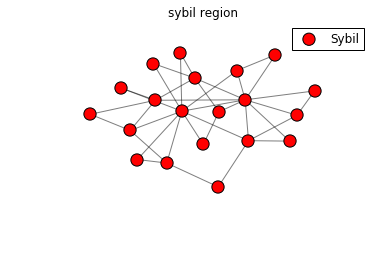

In [3]:
# sybil graphs
sybil_complete_20 = sypy.CompleteGraph(20)
sybil_powerlaw_20 = sypy.PowerLawGraph(20, 2, .3, seed=global_seed)
sybil_powerlaw_50 = sypy.PowerLawGraph(50, 2, .3, seed=global_seed)
sybil_powerlaw_500 = sypy.PowerLawGraph(500, 2, .3, seed=global_seed)
sybil_powerlaw_huge = sypy.PowerLawGraph(500, 2, .3, seed=global_seed)
sybil_cluster_gn_3 = sypy.GirvanNewmanCommunityGraph(num_comm=3, comm_size=20, avg_intercomm=1, 
                                                     seed=global_seed)
sybil_cluster_lrf_4 = sypy.LFRCommunityGraph(num_comm=4, max_comm=50, comm_exp=1.5, max_degree=10, 
                                              degree_exp=1.5, mixing_par=0.08, tries=3, seed=global_seed)
sybil_small_complete = sypy.CompleteGraph(4)

sybil_region = sypy.Region(
    graph = sybil_powerlaw_20,
    name = "sybil region",
    is_sybil = True
)
sybil_region.visualize()

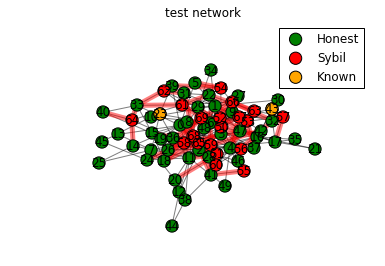

In [31]:
test_network = sypy.Network(honest_region, sybil_region, "test network")
test_network.random_pair_stitch(50)
dist = 1 / np.sqrt(test_network.get_network_stats().order)
test_network.visualize(k=dist*2, labeled=True)

In [32]:
graph = test_network.graph.structure
all_positives = range(test_network.left_region.graph.order())
positives = np.random.choice(all_positives, 5, replace=False)
#positives = [0, 1, 2, 3, 4, 5]
all_negatives = range(test_network.left_region.graph.order(), test_network.right_region.graph.order() 
                  + test_network.left_region.graph.order())
negatives = np.random.choice(all_negatives, 5, replace=False)

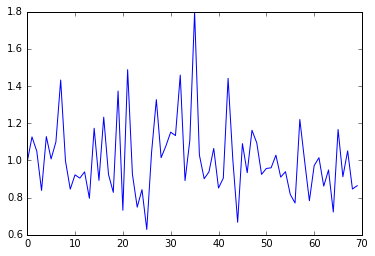

In [33]:
import SybilRank as sr
%reload_ext autoreload
%autoreload 2

sybilRank = sr.SybilRanker(graph, positives, num_iterations=6, deg_norm=True, total_ranking=1)

sybilRank.rank()
ranking = sybilRank.ranking

deg_dict = graph.degree()
deg = np.fromiter(iter(deg_dict.values()), dtype=float)
norm_deg = deg / deg.sum()


plt.plot(ranking)
plt.show()

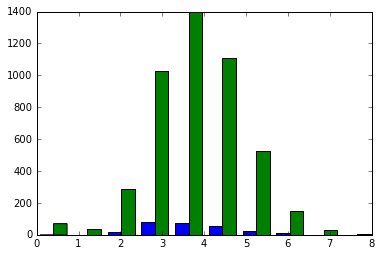

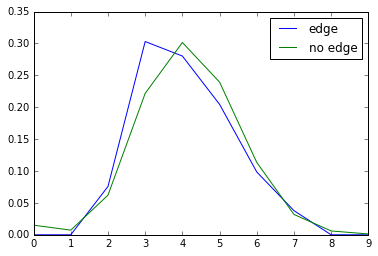

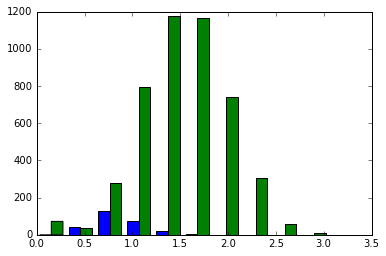

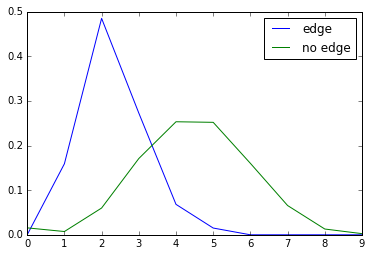

['correlated_feature0start', 'correlated_feature0end', 'correlated_feature1start', 'correlated_feature1end', 'correlated_feature2start', 'correlated_feature2end', 'correlated_feature3start', 'correlated_feature3end', 'correlated_feature4start', 'correlated_feature4end', 'correlated_feature5start', 'correlated_feature5end', 'correlated_feature6start', 'correlated_feature6end', 'correlated_feature7start', 'correlated_feature7end', 'random0', 'random1', 'random2', 'random3', 'random4', 'random5', 'random6', 'random7', 'random8', 'random9', 'random10', 'random11', 'random12', 'random13', 'random14', 'random15', 'random16', 'random17', 'random18', 'random19']


In [34]:
import FeatureGenerator as fg

network_fg = fg.NetworkFeatureGenerator()

#feature_list = network_fg.add_label_as_feature(test_network)

feature_list = network_fg.add_edge_correlated_feature(test_network, plot=True, stay_factor=10, iterations=6)

random_features = network_fg.add_random_features(test_network, dim=20)
#
feature_list += random_features
print feature_list


 TOTAL LOSS: 133.333983766 


 TOTAL LOSS: 133.333983766 


 TOTAL LOSS: 133.333983767 


 TOTAL LOSS: 133.333983766 


 TOTAL LOSS: 133.333983765 


 TOTAL LOSS: 133.333983767 


 TOTAL LOSS: 133.333983767 


 TOTAL LOSS: 133.333983767 


 TOTAL LOSS: 133.333983768 


 TOTAL LOSS: 133.333983766 


 TOTAL LOSS: 133.333983766 


 TOTAL LOSS: 133.333983765 


 TOTAL LOSS: 133.333983765 


 TOTAL LOSS: 133.333983767 


 TOTAL LOSS: 133.333983767 


 TOTAL LOSS: 133.333983768 


 TOTAL LOSS: 133.333983769 


 TOTAL LOSS: 133.333983765 


 TOTAL LOSS: 133.333983765 


 TOTAL LOSS: 133.333983764 


 TOTAL LOSS: 133.333983764 


 TOTAL LOSS: 133.333983764 


 TOTAL LOSS: 133.333983764 


 TOTAL LOSS: 133.333983764 


 TOTAL LOSS: 133.333983765 


 TOTAL LOSS: 133.333983765 


 TOTAL LOSS: 133.333983764 


 TOTAL LOSS: 133.333983763 


 TOTAL LOSS: 133.333983764 


 TOTAL LOSS: 133.333983765 


 TOTAL LOSS: 133.333983764 


 TOTAL LOSS: 133.333983764 


 TOTAL LOSS: 133.333983764 


 TOTAL LO

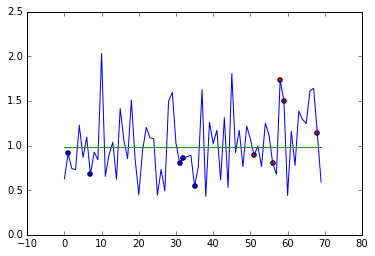

In [36]:
import SupervisedRandomWalk as srw
super_walker = srw.SRWSVM(graph, feature_list, positives, positives, negatives,
                 strength_function='logistic', loss_function='hinge_loss', loss_factor=10,
                regularization_factor=1, iteration_stop=10, deg_norm=True, total_ranking=1, c=10)
init_w = np.random.rand(len(feature_list) + 2)
#init_w = np.array([0, 6, -10])
super_walker.update_weight(init_w)
super_walker.train()
super_ranking = super_walker.rank()
plt.plot(super_ranking)
plt.scatter(super_walker.positives, super_ranking[super_walker.positives])
plt.scatter(super_walker.negatives, super_ranking[super_walker.negatives], c='red')
threshold_line = np.ones(super_ranking.shape[0]) * -super_walker.b / super_walker.svm_w
plt.plot(threshold_line)

print super_walker.calc_real_loss_without_reg()